## 5. Add Statistics CSV to Shapefile

Use this notebook to add hydrologic statistic attributes to the segments shapefile. Run this after adding HUC8 outlet attributes to the shapefile.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

### Open files and merge

In [2]:
csv = pd.read_csv("stats_diff.csv")
gdf = gpd.read_file("/import/beegfs/CMIP6/jdpaul3/hydroviz_data/gis/xwalk/seg_h8_outlets.shp")
gdf_stats = pd.merge(gdf, csv, left_on='seg_id_nat', right_on='stream_id', how='left').drop(columns=['stream_id'])

In [3]:
vars = {
        "ma99_diff":{
                "name":"Mean Annual Flow",
                "units":"cfs",
                "difference":"percentage"
        },
        "ma12_diff":{
                "name":"January Mean Flow",
                "units":"cfs",
                "difference":"percentage"
        },
        "ma13_diff":{
                "name":"February Mean Flow",
                "units":"cfs",
                "difference":"percentage"
        }, 
        "ma14_diff":{
                "name":"March Mean Flow",
                "units":"cfs",
                "difference":"percentage"
        }, 
        "ma15_diff":{
                "name":"April Mean Flow",
                "units":"cfs",
                "difference":"percentage"
        }, 
        "ma16_diff":{
                "name":"May Mean Flow",
                "units":"cfs",
                "difference":"percentage"
        },
        "ma17_diff": {
                "name":"June Mean Flow",
                "units":"cfs",
                "difference":"percentage"
        }, 
        "ma18_diff": {
                "name":"July Mean Flow",
                "units":"cfs",
                "difference":"percentage"
        }, 
        "ma19_diff": {
                "name":"August Mean Flow",
                "units":"cfs",
                "difference":"percentage"
        }, 
        "ma20_diff": {
                "name":"September Mean Flow",
                "units":"cfs",
                "difference":"percentage"
        }, 
        "ma21_diff": {
                "name":"October Mean Flow",
                "units":"cfs",
                "difference":"percentage"
        }, 
        "ma22_diff": {
                "name":"November Mean Flow",
                "units":"cfs",
                "difference":"percentage"
        },
        "ma23_diff": {
                "name":"December Mean Flow",
                "units":"cfs",
                "difference":"percentage"
        },
        "dh1_diff": {
                "name":"Annual Maximum Daily Flow",
                "units":"cfs",
                "difference":"percentage"
        },
        "dl1_diff": {
                "name":"Annual Minimum Daily Flow",
                "units":"cfs",
                "difference":"percentage"
        },
        "dh15_diff": {
                "name":"High Flow Pulse Duration",
                "units":"days per year",
                "difference":"absolute"
        },
        "dl16_diff": {
                "name":"Low Flow Pulse Duration",
                "units":"days per year",
                "difference":"absolute"
        },
        "fh1_diff": {
                "name":"High Flood Pulse Count",
                "units":"events per year",
                "difference":"absolute"
        },
        "fl1_diff": {
                "name":"Low Flood Pulse Count",
                "units":"events per year",
                "difference":"absolute"
        },
        "th1_diff": {
                "name":"Date of Annual Maximum Daily Flow",
                "units":"day of year",
                "difference":"absolute"
        },
        "tl1_diff": {
                "name":"Date of Annual Minimum Daily Flow",
                "units":"day of year",
                "difference":"absolute"
        },
}

### Visualize

Pick a few variables and plot them.

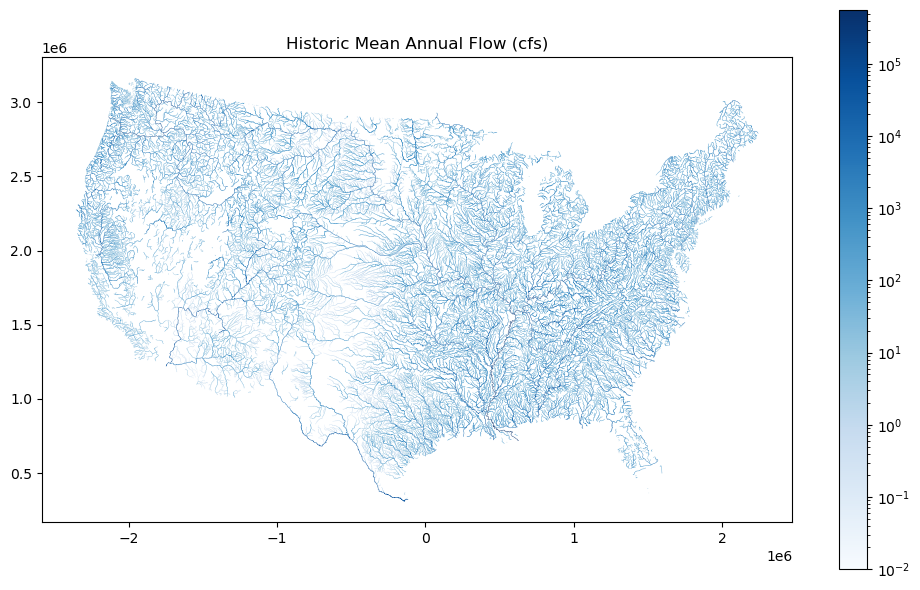

In [4]:
# historic mean annual flow - we plan to use this as the default statistic in the web app map
# use a logarithmic color scale to better show variation

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf_stats.plot(column="ma99_hist", ax=ax, cmap='Blues', norm=colors.LogNorm(), legend=True, linewidth=0.3)
plt.title("Historic Mean Annual Flow (cfs)")
plt.tight_layout()

In [5]:
def diff_plot(var):
    name = vars[var]['name']
    units = vars[var]['units']
    diff_method = vars[var]['difference']

    if diff_method == 'percentage':
        divnorm = colors.TwoSlopeNorm(vmin=-100, vcenter=0, vmax=100)

    if diff_method == 'absolute':
        vmin = gdf_stats[var].min()
        vmax = gdf_stats[var].max()
        if abs(vmin) > abs(vmax):
            divnorm = colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=-vmin)
        else:
            divnorm = colors.TwoSlopeNorm(vmin=-vmax, vcenter=0, vmax=vmax)

    fig_, ax = plt.subplots(1, 1, figsize=(10, 6))
    gdf_stats.plot(ax=ax, color='lightgray', linewidth=0.3, zorder=0)
    gdf_stats.plot(column=var, ax=ax, cmap='BrBG', norm=divnorm, legend=True, linewidth=0.3, zorder=1)
    plt.title(f"Change in {name} ({units}): {diff_method}")
    plt.show()

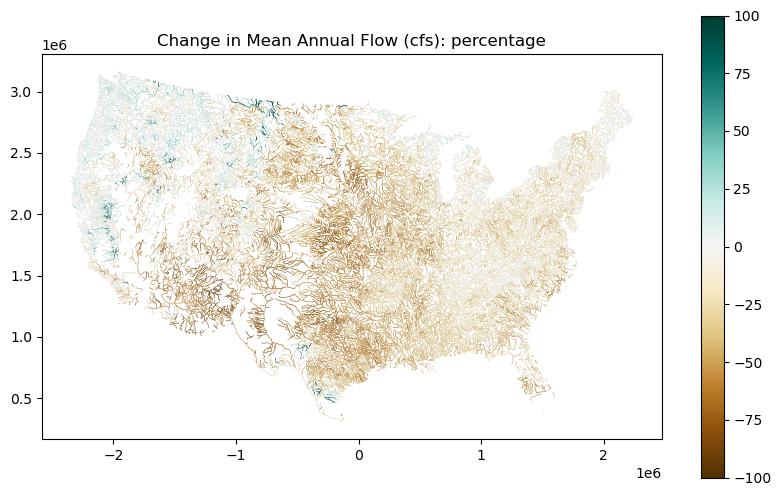

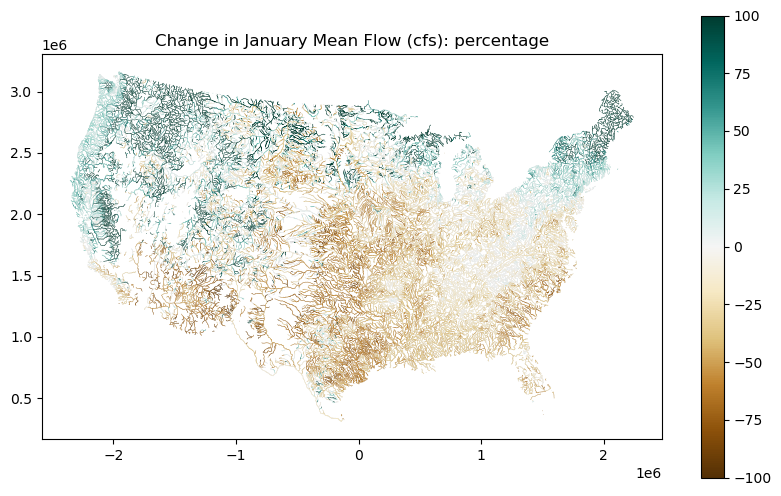

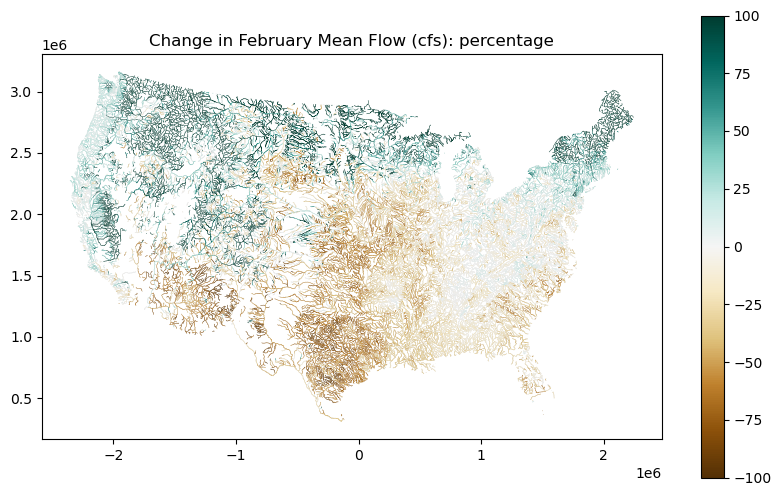

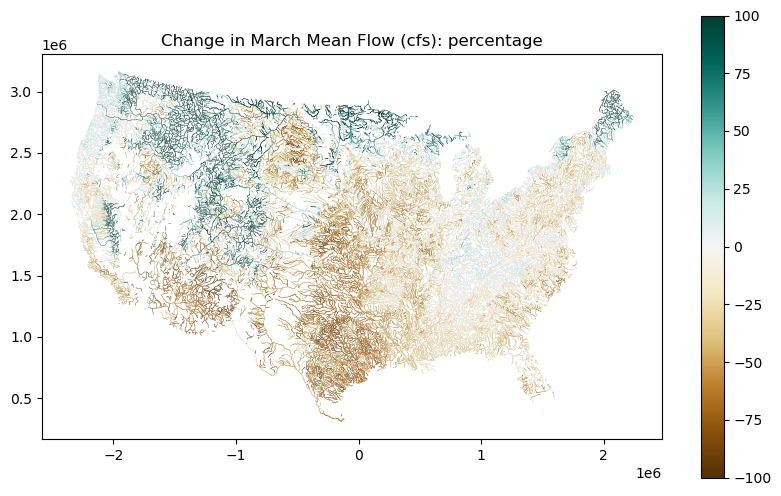

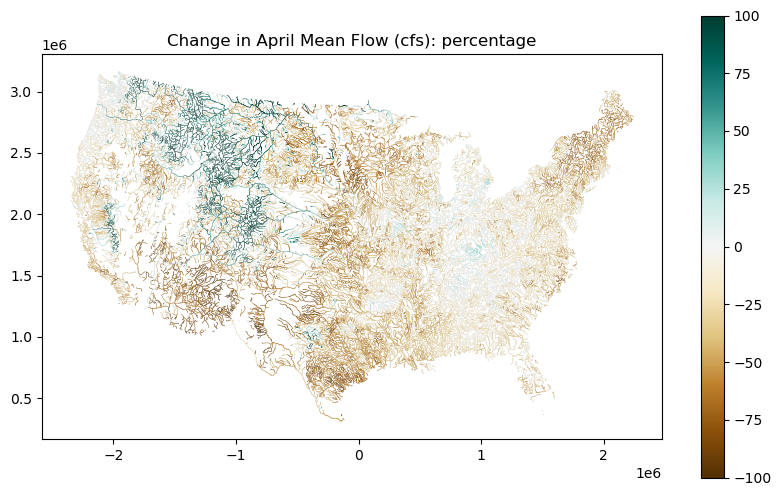

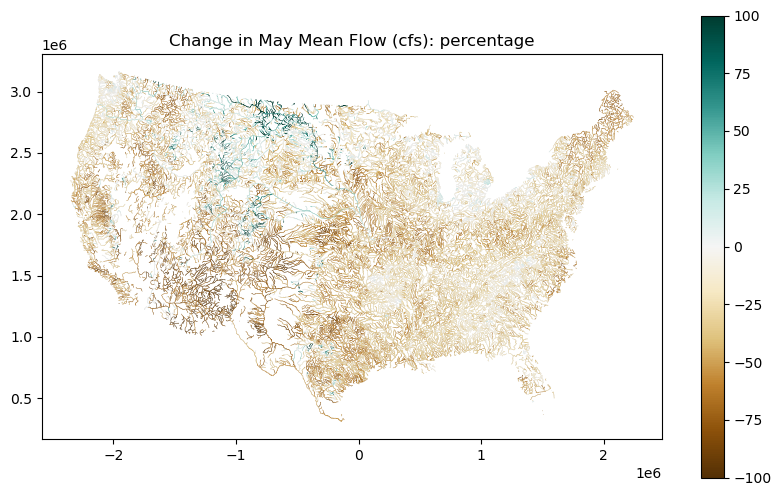

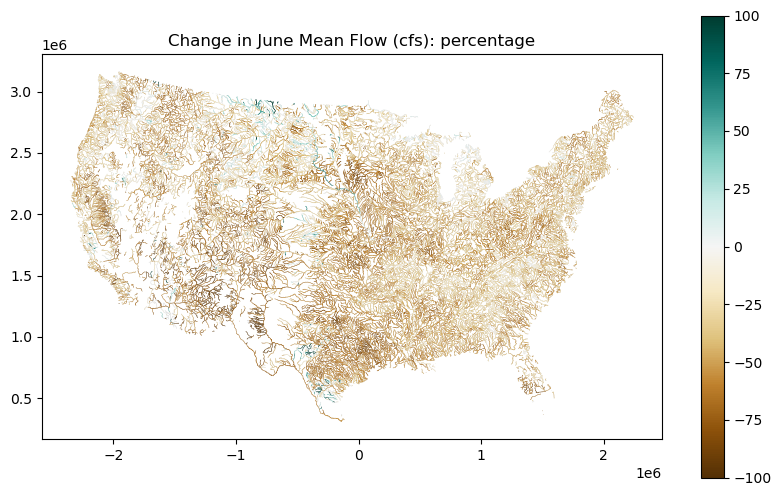

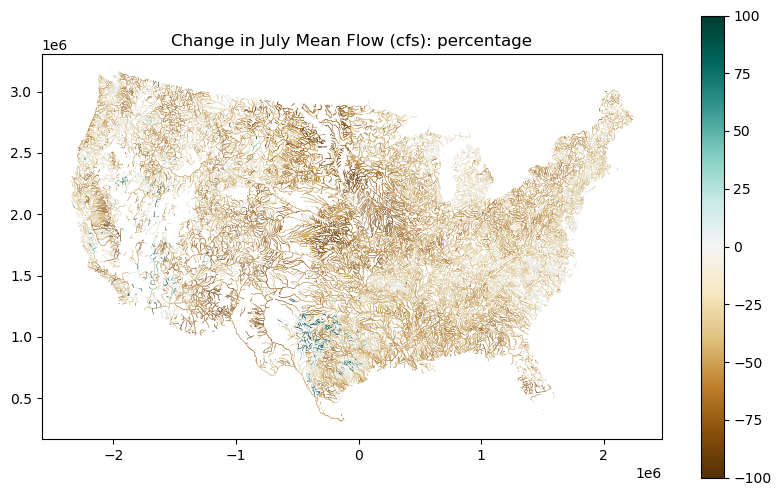

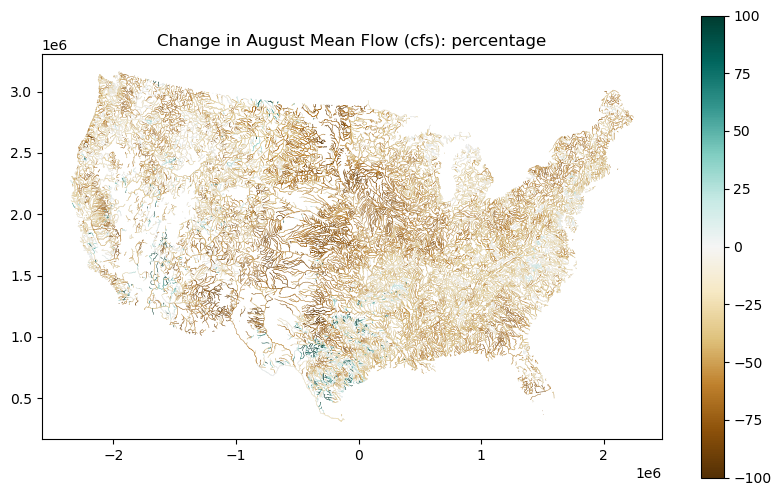

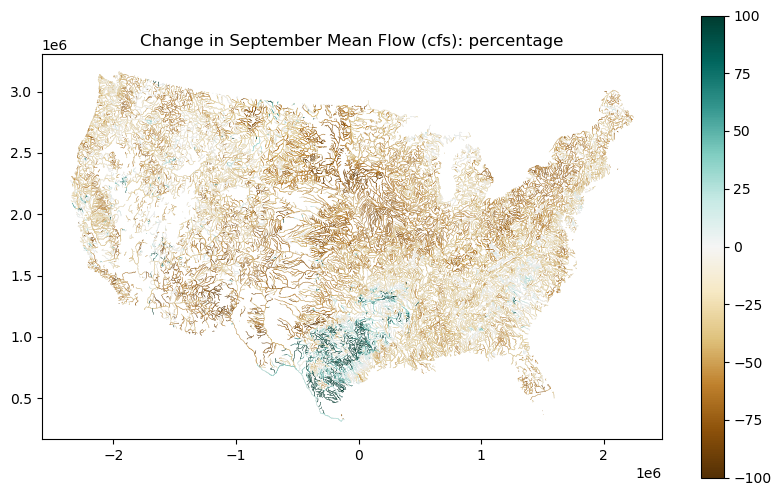

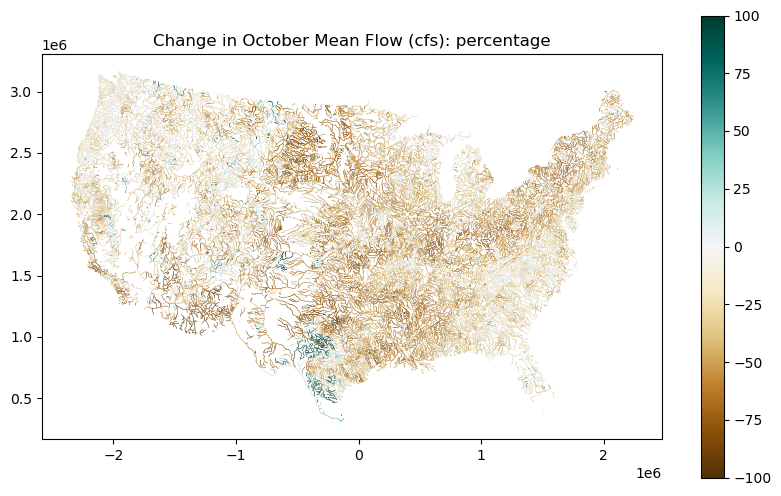

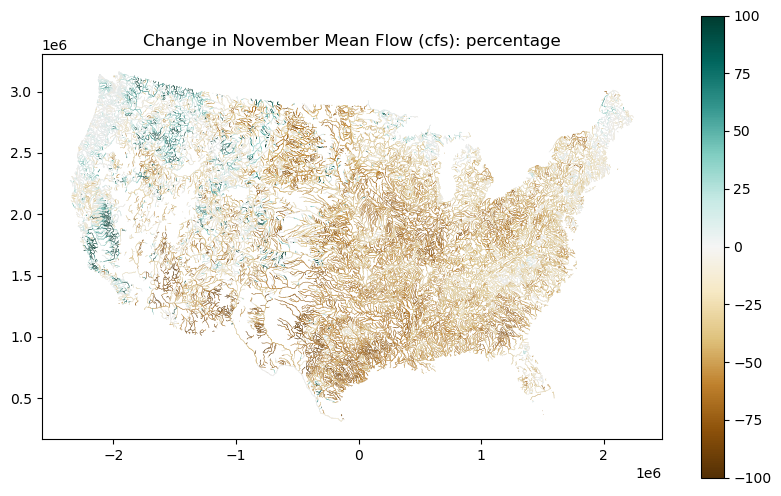

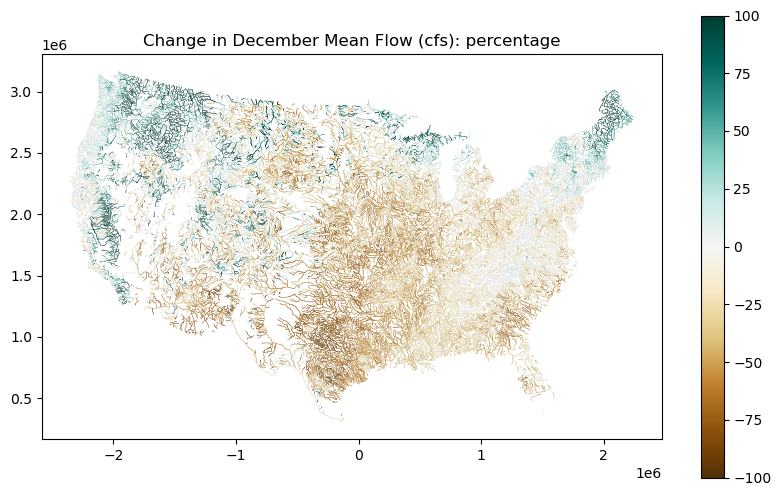

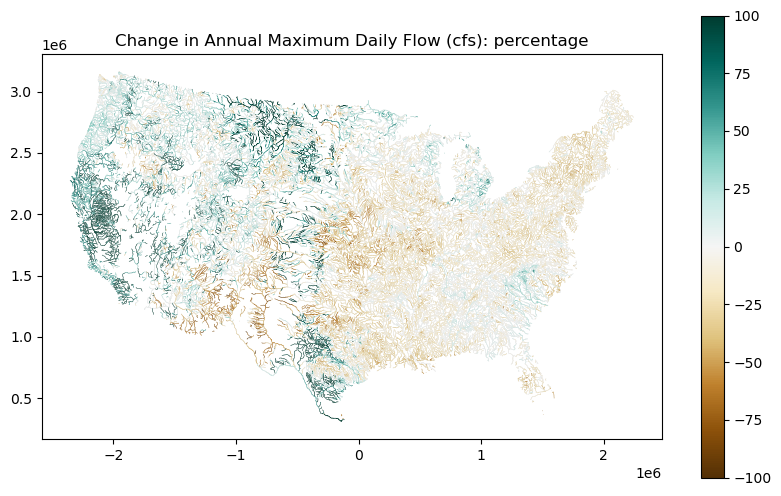

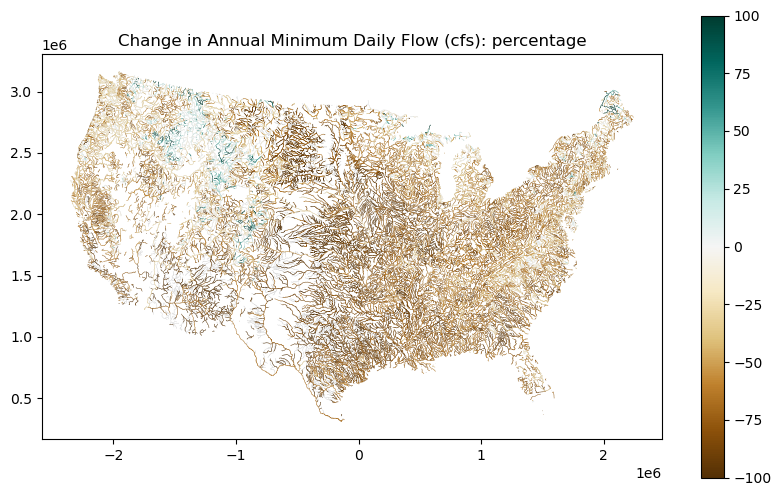

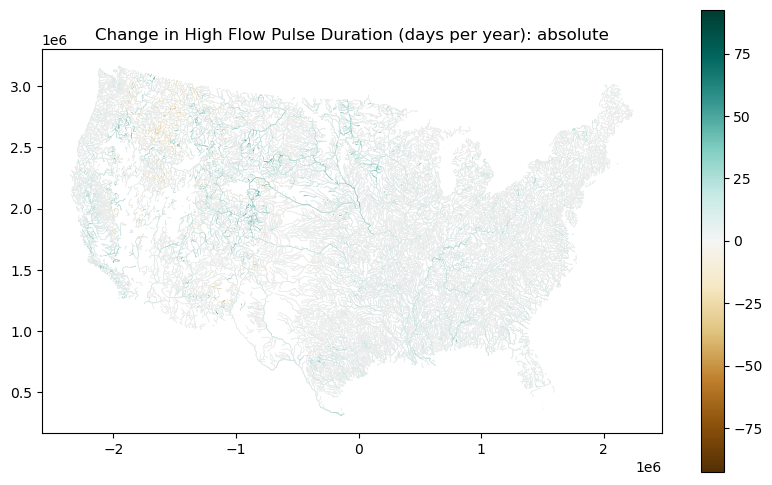

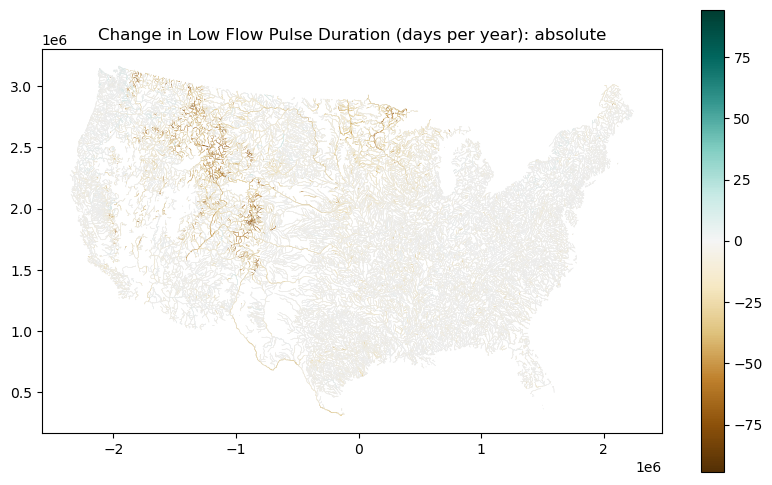

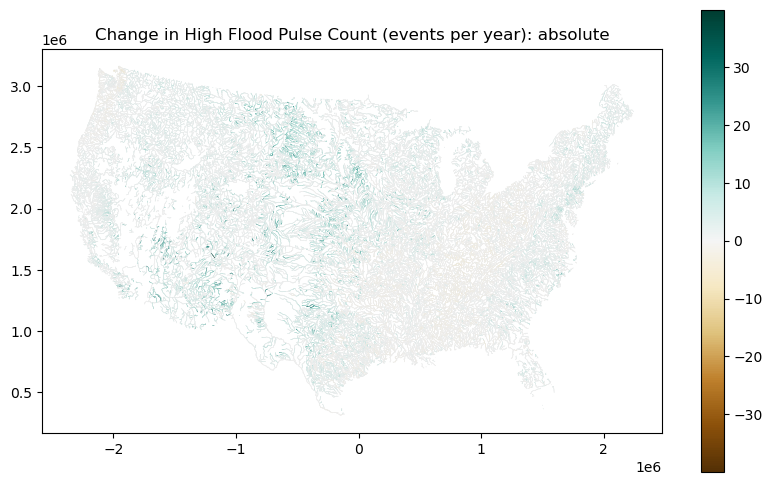

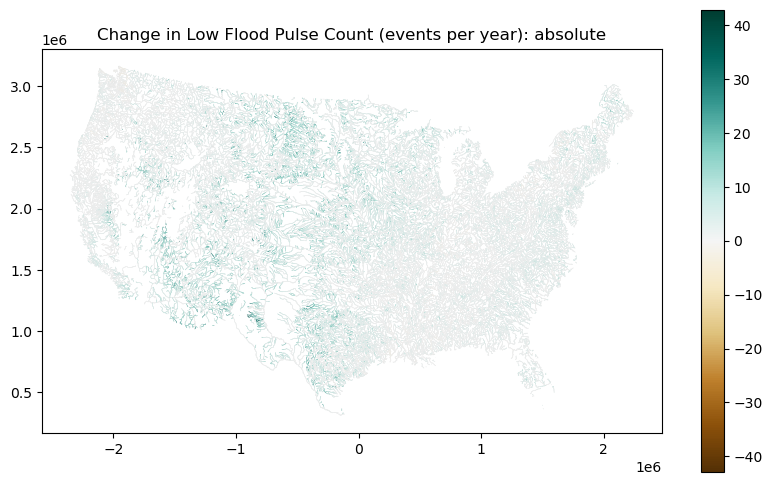

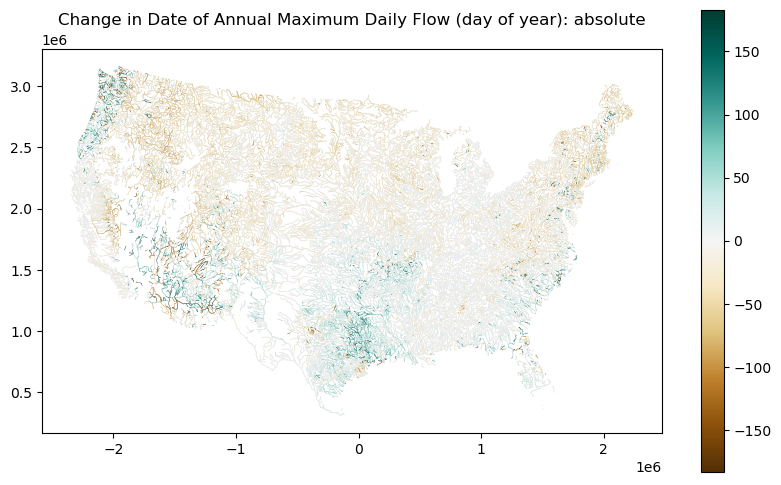

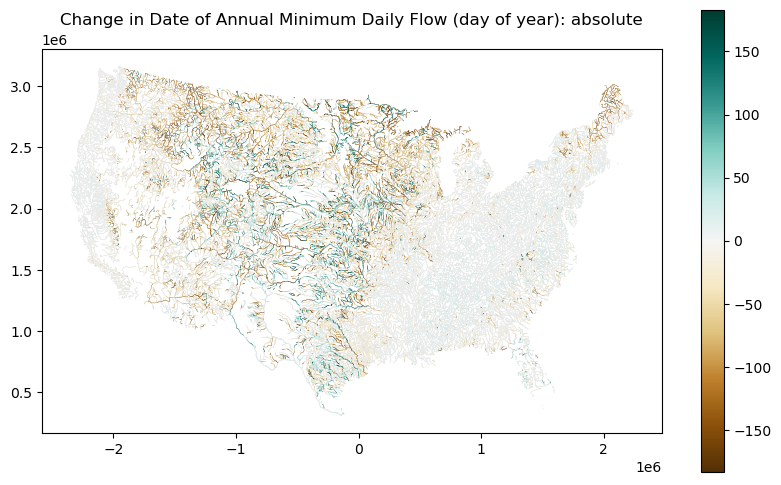

In [6]:
for var in vars.keys():
    diff_plot(var)

### Save

Drop the `th1` and `tl1` columns and save.

In [9]:
gdf_stats.drop(columns=['th1_diff', 'tl1_diff'], inplace=True)
gdf_stats.to_file("/import/beegfs/CMIP6/jdpaul3/hydroviz_data/gis/xwalk/seg_h8_outlet_stats.shp")